# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [53]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
#建立模型
model = Sequential()

In [55]:
model.add(Dense(units=256, input_dim=784, activation='relu'))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(units=10, activation='softmax'))

# 訓練模型

In [56]:
model.compile(loss='categorical_crossentropy', 
              optimizer='RMSprop', metrics=['accuracy'])

In [57]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=100,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 57us/step - loss: 0.2593 - acc: 0.9207 - val_loss: 0.1307 - val_acc: 0.9608
Epoch 2/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.1043 - acc: 0.9682 - val_loss: 0.1146 - val_acc: 0.9677
Epoch 3/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.0720 - acc: 0.9775 - val_loss: 0.1117 - val_acc: 0.9705
Epoch 4/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.0560 - acc: 0.9825 - val_loss: 0.0924 - val_acc: 0.9748
Epoch 5/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.0440 - acc: 0.9858 - val_loss: 0.0935 - val_acc: 0.9769
Epoch 6/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.0355 - acc: 0.9891 - val_loss: 0.1217 - val_acc: 0.9730
Epoch 7/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.0290 - acc: 0.9909 - val_loss: 0.1128 - val_acc

# 以圖形顯示訓練過程

In [58]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

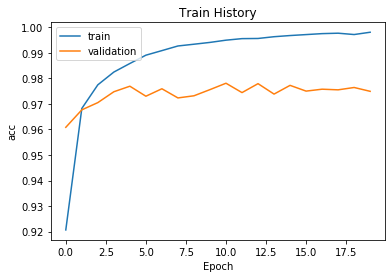

In [59]:
show_train_history(train_history,'acc','val_acc')

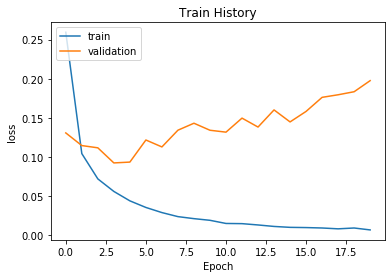

In [60]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [61]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 32us/step

accuracy= 0.9746
